Rewrite of: Method1_10-stock-DCP.pdf

In [1]:
# !pip install cvxpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cvxpy import *



In [3]:
# Use prediction results for MVO

In [4]:
df = pd.read_csv("2017predict.csv")
df = df.set_index('Date')
df

,AAV,ADVANC,AMATA,AOT,AP,BA,BANPU,BBL,BCH,BCP,...,TTA,TTCL,TTW,TU,TVO,UNIQ,VGI,VIBHA,VNG,WHA
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-16,6.232253,175.794618,15.655079,39.967695,7.390478,21.105266,19.961343,183.106289,14.170926,35.086826,...,10.010886,19.395470,10.760391,19.544756,41.250923,18.125492,5.156282,2.891833,15.378970,3.270242
2017-02-17,6.269532,176.585478,15.749472,40.184469,7.435996,21.059504,19.650504,183.654080,14.317634,35.115265,...,10.141241,19.688548,10.762650,19.316085,41.379895,18.285887,5.140087,2.893892,15.541334,3.228477
2017-02-20,6.214249,173.871956,16.030738,40.404344,7.436325,20.913482,19.723706,184.160007,14.214027,33.433528,...,10.627682,19.404421,10.761691,19.428784,40.844053,18.133857,5.175092,2.867692,15.444618,3.184238
2017-02-21,6.203613,170.550548,16.218602,39.701591,7.380649,20.284422,19.376665,179.894086,14.067695,33.115483,...,10.300507,18.902498,10.842920,19.196699,40.964345,17.984319,5.092206,2.835631,15.162015,3.040150
2017-02-22,6.140224,172.631922,16.101116,40.075578,7.323652,20.352504,19.349912,180.141131,13.972480,33.432353,...,10.362379,18.856771,10.926093,19.316668,41.120557,18.168752,5.128688,2.851302,15.033087,3.030796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,6.246940,187.746678,25.271278,63.926290,9.112736,17.376086,20.633239,206.819206,15.694541,39.419026,...,8.652474,17.015545,12.525255,19.333715,29.766227,15.257064,6.253031,2.519383,10.641420,3.906027
2017-12-25,6.124235,189.170365,25.433263,64.812453,9.033019,17.193339,20.170234,208.210044,15.695932,39.711411,...,8.490315,16.855424,12.587594,19.477752,29.936169,15.088116,6.303193,2.513411,10.610799,3.966927
2017-12-26,6.118868,188.906405,25.498287,65.675921,9.044854,17.014700,20.205469,205.640847,15.604218,40.217179,...,8.741919,16.579952,12.521848,19.358610,29.763738,15.005981,6.432073,2.538852,10.354448,3.983628


In [5]:
df_return = df.pct_change() * 100 # Use log function instead.
df_return = df_return.dropna()
df_return

,AAV,ADVANC,AMATA,AOT,AP,BA,BANPU,BBL,BCH,BCP,...,TTA,TTCL,TTW,TU,TVO,UNIQ,VGI,VIBHA,VNG,WHA
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-17,0.598154,0.449877,0.602955,0.542373,0.615895,-0.216831,-1.557205,0.299166,1.035276,0.081053,...,1.302129,1.511064,0.020990,-1.169987,0.312653,0.884919,-0.314087,0.071225,1.055753,-1.277140
2017-02-20,-0.881770,-1.536662,1.785878,0.547165,0.004430,-0.693375,0.372521,0.275478,-0.723630,-4.789193,...,4.796662,-1.443109,-0.008910,0.583449,-1.294933,-0.831409,0.681013,-0.905375,-0.622313,-1.370271
2017-02-21,-0.171152,-1.910261,1.171895,-1.739301,-0.748710,-3.007919,-1.759511,-2.316421,-1.029490,-0.951274,...,-3.078512,-2.586644,0.754803,-1.194542,0.294516,-0.824635,-1.601633,-1.117985,-1.829783,-4.525038
2017-02-22,-1.021803,1.220385,-0.724392,0.941995,-0.772249,0.335640,-0.138069,0.137328,-0.676836,0.956864,...,0.600667,-0.241907,0.767068,0.624946,0.381334,1.025522,0.716436,0.552616,-0.850341,-0.307670
2017-02-23,0.700077,0.007862,0.896733,-1.573557,1.449647,-1.064656,0.281176,-0.253250,0.372263,2.937042,...,-2.028215,-2.544236,0.102659,-0.262086,-1.780605,-2.600669,-0.200787,0.673133,-0.258514,3.459116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,1.114001,0.445246,0.643649,0.583401,0.856044,-0.001506,0.511389,0.166435,0.070655,1.226342,...,-2.970337,-0.461257,-0.015423,0.173617,-0.521270,-0.525101,0.087838,0.903067,1.203919,-0.929172
2017-12-25,-1.964243,0.758302,0.640982,1.386225,-0.874791,-1.051715,-2.243977,0.672490,0.008864,0.741736,...,-1.874138,-0.941028,0.497701,0.745009,0.570920,-1.107342,0.802202,-0.237010,-0.287748,1.559129
2017-12-26,-0.087632,-0.139535,0.255668,1.332256,0.131019,-1.039005,0.174686,-1.233945,-0.584316,1.273609,...,2.963426,-1.634322,-0.522308,-0.611683,-0.575995,-0.544370,2.044691,1.012201,-2.415944,0.421005


In [6]:
df_return.cov() # Covariance matrix from whole 2017 prediction. Dont use this. 
# Need to develop walk-forward

,AAV,ADVANC,AMATA,AOT,AP,BA,BANPU,BBL,BCH,BCP,...,TTA,TTCL,TTW,TU,TVO,UNIQ,VGI,VIBHA,VNG,WHA
AAV,2.020733,0.298274,0.186766,0.196743,0.268019,0.109824,0.252544,0.026222,0.054251,0.034401,...,0.096241,0.266418,0.043297,0.331579,-0.018885,0.370873,-0.063360,0.344636,0.114919,0.212200
ADVANC,0.298274,1.680827,0.300611,0.268681,0.119868,-0.002666,0.175833,0.226374,0.111721,0.261108,...,0.237599,0.122424,-0.152954,0.232129,0.113489,0.368102,0.169402,-0.010242,0.208888,0.345614
AMATA,0.186766,0.300611,2.081555,0.039407,0.241466,-0.047221,0.356812,0.267151,0.231493,-0.196494,...,0.127238,0.437841,-0.064180,0.370581,0.103306,0.254725,0.346092,0.507509,0.123146,1.114337
AOT,0.196743,0.268681,0.039407,0.751626,0.012320,0.144697,0.022933,0.084241,0.000490,0.206192,...,0.190162,-0.022980,-0.040016,0.079320,0.056428,-0.011689,0.012312,0.058719,-0.035826,-0.010379
AP,0.268019,0.119868,0.241466,0.012320,1.592920,-0.184687,0.120219,0.065456,0.241693,-0.117708,...,0.202748,-0.022661,0.181921,0.008903,0.169146,0.456118,0.168522,0.087046,-0.091127,0.431493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNIQ,0.370873,0.368102,0.254725,-0.011689,0.456118,0.026745,0.716440,0.378850,0.115146,0.228414,...,1.116421,1.448058,0.113663,0.573963,0.468724,3.836553,0.485247,0.196001,0.494812,0.241230
VGI,-0.063360,0.169402,0.346092,0.012312,0.168522,0.121428,0.600355,-0.058862,0.222819,0.351390,...,0.066843,0.888291,-0.028519,-0.035535,0.175292,0.485247,3.774936,0.312342,0.260377,0.209516
VIBHA,0.344636,-0.010242,0.507509,0.058719,0.087046,0.371648,0.216251,0.069437,0.288537,0.135317,...,-0.260100,0.791400,-0.148705,0.066861,-0.073523,0.196001,0.312342,1.520413,0.175958,0.640996
VNG,0.114919,0.208888,0.123146,-0.035826,-0.091127,0.223886,0.523403,0.048859,0.193394,0.240755,...,0.193268,0.537980,-0.171943,0.098724,0.246859,0.494812,0.260377,0.175958,2.855402,0.046071


In [7]:
mean_returns = df_return.mean()
mean_returns

AAV      -0.003664
ADVANC    0.047887
AMATA     0.235671
AOT       0.236315
AP        0.103217
            ...   
UNIQ     -0.069069
VGI       0.134575
VIBHA    -0.063409
VNG      -0.160770
WHA       0.104126
Length: 88, dtype: float64

In [51]:
cov_matrix = df_return.cov()
risk_free_rate = 0.0178 # Changeme
cov_matrix

,AAV,ADVANC,AMATA,AOT,AP,BA,BANPU,BBL,BCH,BCP,...,TTA,TTCL,TTW,TU,TVO,UNIQ,VGI,VIBHA,VNG,WHA
AAV,2.020733,0.298274,0.186766,0.196743,0.268019,0.109824,0.252544,0.026222,0.054251,0.034401,...,0.096241,0.266418,0.043297,0.331579,-0.018885,0.370873,-0.063360,0.344636,0.114919,0.212200
ADVANC,0.298274,1.680827,0.300611,0.268681,0.119868,-0.002666,0.175833,0.226374,0.111721,0.261108,...,0.237599,0.122424,-0.152954,0.232129,0.113489,0.368102,0.169402,-0.010242,0.208888,0.345614
AMATA,0.186766,0.300611,2.081555,0.039407,0.241466,-0.047221,0.356812,0.267151,0.231493,-0.196494,...,0.127238,0.437841,-0.064180,0.370581,0.103306,0.254725,0.346092,0.507509,0.123146,1.114337
AOT,0.196743,0.268681,0.039407,0.751626,0.012320,0.144697,0.022933,0.084241,0.000490,0.206192,...,0.190162,-0.022980,-0.040016,0.079320,0.056428,-0.011689,0.012312,0.058719,-0.035826,-0.010379
AP,0.268019,0.119868,0.241466,0.012320,1.592920,-0.184687,0.120219,0.065456,0.241693,-0.117708,...,0.202748,-0.022661,0.181921,0.008903,0.169146,0.456118,0.168522,0.087046,-0.091127,0.431493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNIQ,0.370873,0.368102,0.254725,-0.011689,0.456118,0.026745,0.716440,0.378850,0.115146,0.228414,...,1.116421,1.448058,0.113663,0.573963,0.468724,3.836553,0.485247,0.196001,0.494812,0.241230
VGI,-0.063360,0.169402,0.346092,0.012312,0.168522,0.121428,0.600355,-0.058862,0.222819,0.351390,...,0.066843,0.888291,-0.028519,-0.035535,0.175292,0.485247,3.774936,0.312342,0.260377,0.209516
VIBHA,0.344636,-0.010242,0.507509,0.058719,0.087046,0.371648,0.216251,0.069437,0.288537,0.135317,...,-0.260100,0.791400,-0.148705,0.066861,-0.073523,0.196001,0.312342,1.520413,0.175958,0.640996
VNG,0.114919,0.208888,0.123146,-0.035826,-0.091127,0.223886,0.523403,0.048859,0.193394,0.240755,...,0.193268,0.537980,-0.171943,0.098724,0.246859,0.494812,0.260377,0.175958,2.855402,0.046071


In [54]:
returns = df_return.dropna() # The first data is nan. # Convert daily return data frame to a numpy matrix
return_data = returns.as_matrix().T 
return_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[ 0.59815389, -0.88177001, -0.17115228, ..., -0.0876324 ,
        -0.07805486, -0.98178189],
       [ 0.44987743, -1.53666215, -1.91026073, ..., -0.13953539,
         0.1438991 ,  1.00195167],
       [ 0.60295455,  1.78587829,  1.1718948 , ...,  0.25566791,
        -0.31605512, -0.94515523],
       ...,
       [ 0.07122499, -0.90537487, -1.11798482, ...,  1.01220111,
        -0.93417689, -1.01001546],
       [ 1.05575258, -0.6223133 , -1.82978296, ..., -2.41594398,
        -0.24531326,  2.9367546 ],
       [-1.27713997, -1.37027093, -4.52503752, ...,  0.42100475,
        -0.48632807, -2.02511387]])

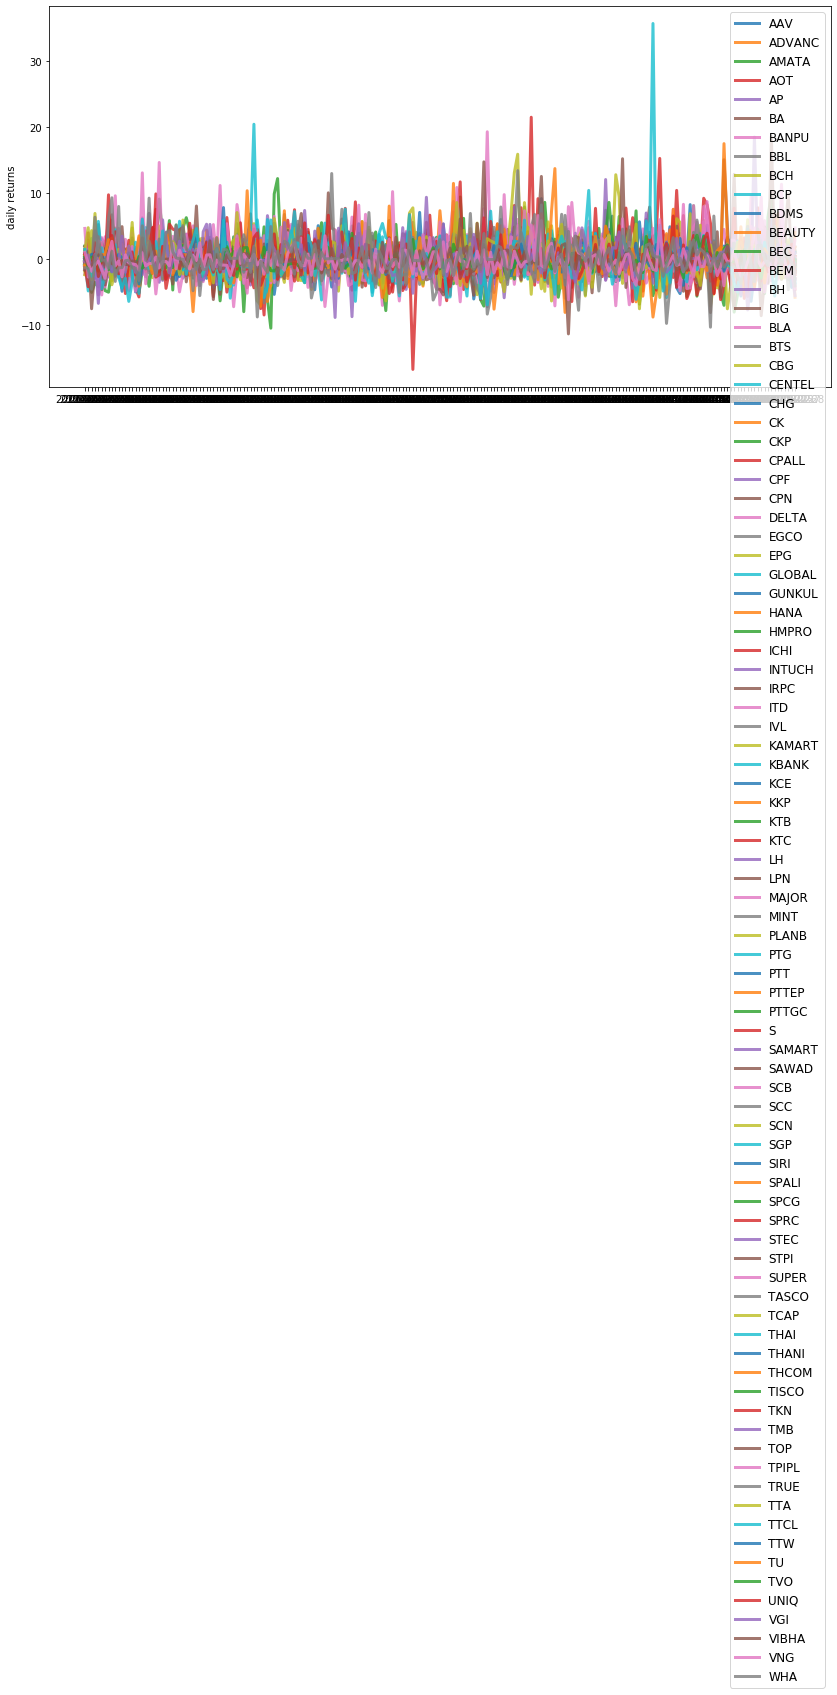

In [9]:
#  Plot daily return

plt.figure(figsize=(14, 7))
for c in df_return.columns.values:
    plt.plot(df_return.index, df_return[c], lw=3, alpha=0.8,label=c) 
    plt.legend(loc='upper right', fontsize=12)
    plt.ylabel('daily returns')

In [55]:
# Mean return

r = np.mean(return_data, axis=1)
r

array([-0.00366427,  0.04788719,  0.23567092,  0.2363151 ,  0.10321696,
       -0.0867471 ,  0.0430784 ,  0.05240757,  0.0567068 ,  0.0647097 ,
        0.0190378 ,  0.32404977, -0.19068335,  0.04033208,  0.02569338,
       -0.26722389, -0.1633976 ,  0.01556614,  0.05021114,  0.21430226,
       -0.12271217, -0.02266244,  0.10941456,  0.13725991, -0.07083816,
        0.21518509, -0.10134256,  0.03940158, -0.07452159,  0.02932721,
       -0.06494038,  0.04541036,  0.14665872, -0.00865132,  0.0055351 ,
        0.1444381 , -0.11743037,  0.17128493, -0.08404489,  0.08934697,
       -0.13976407,  0.1265806 , -0.00593856,  0.14280534,  0.03075028,
        0.04540104, -0.0365403 ,  0.13318118,  0.00617571, -0.11369829,
        0.05362056,  0.0645551 ,  0.10266187, -0.12725059, -0.06681162,
        0.21856121, -0.00925779, -0.03714779, -0.17436589,  0.29478396,
        0.02390973, -0.01354051, -0.00368463,  0.12849562, -0.05172675,
       -0.19519002, -0.00471426, -0.04334993,  0.06839152, -0.08

In [56]:
# Covariance matrix

C = np.asmatrix(np.cov(return_data))
C

/opt/conda/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


matrix([[ 2.02073315,  0.29827387,  0.18676622, ...,  0.34463554,
          0.1149191 ,  0.21219981],
        [ 0.29827387,  1.68082676,  0.30061142, ..., -0.01024185,
          0.20888844,  0.34561421],
        [ 0.18676622,  0.30061142,  2.08155523, ...,  0.50750911,
          0.12314595,  1.11433697],
        ...,
        [ 0.34463554, -0.01024185,  0.50750911, ...,  1.52041334,
          0.17595788,  0.64099627],
        [ 0.1149191 ,  0.20888844,  0.12314595, ...,  0.17595788,
          2.85540243,  0.04607113],
        [ 0.21219981,  0.34561421,  1.11433697, ...,  0.64099627,
          0.04607113,  4.55092362]])

In [57]:
symbols = df_return.columns
symbols

Index(['AAV', 'ADVANC', 'AMATA', 'AOT', 'AP', 'BA', 'BANPU', 'BBL', 'BCH',
       'BCP', 'BDMS', 'BEAUTY', 'BEC', 'BEM', 'BH', 'BIG', 'BLA', 'BTS', 'CBG',
       'CENTEL', 'CHG', 'CK', 'CKP', 'CPALL', 'CPF', 'CPN', 'DELTA', 'EGCO',
       'EPG', 'GLOBAL', 'GUNKUL', 'HANA', 'HMPRO', 'ICHI', 'INTUCH', 'IRPC',
       'ITD', 'IVL', 'KAMART', 'KBANK', 'KCE', 'KKP', 'KTB', 'KTC', 'LH',
       'LPN', 'MAJOR', 'MINT', 'PLANB', 'PTG', 'PTT', 'PTTEP', 'PTTGC', 'S',
       'SAMART', 'SAWAD', 'SCB', 'SCC', 'SCN', 'SGP', 'SIRI', 'SPALI', 'SPCG',
       'SPRC', 'STEC', 'STPI', 'SUPER', 'TASCO', 'TCAP', 'THAI', 'THANI',
       'THCOM', 'TISCO', 'TKN', 'TMB', 'TOP', 'TPIPL', 'TRUE', 'TTA', 'TTCL',
       'TTW', 'TU', 'TVO', 'UNIQ', 'VGI', 'VIBHA', 'VNG', 'WHA'],
      dtype='object')

In [58]:
# Print expected returns and risk
for j in range(len(symbols)):
    print ('%s: Exp ret = %f, Risk = %f' %(symbols[j],r[j], C[j,j]**0.5))

AAV: Exp ret = -0.003664, Risk = 1.421525
ADVANC: Exp ret = 0.047887, Risk = 1.296467
AMATA: Exp ret = 0.235671, Risk = 1.442760
AOT: Exp ret = 0.236315, Risk = 0.866964
AP: Exp ret = 0.103217, Risk = 1.262109
BA: Exp ret = -0.086747, Risk = 1.701608
BANPU: Exp ret = 0.043078, Risk = 2.155035
BBL: Exp ret = 0.052408, Risk = 1.068144
BCH: Exp ret = 0.056707, Risk = 1.044843
BCP: Exp ret = 0.064710, Risk = 1.503451
BDMS: Exp ret = 0.019038, Risk = 1.241901
BEAUTY: Exp ret = 0.324050, Risk = 1.099285
BEC: Exp ret = -0.190683, Risk = 3.668762
BEM: Exp ret = 0.040332, Risk = 1.228567
BH: Exp ret = 0.025693, Risk = 1.404268
BIG: Exp ret = -0.267224, Risk = 0.978772
BLA: Exp ret = -0.163398, Risk = 2.038527
BTS: Exp ret = 0.015566, Risk = 1.192519
CBG: Exp ret = 0.050211, Risk = 1.586623
CENTEL: Exp ret = 0.214302, Risk = 1.585427
CHG: Exp ret = -0.122712, Risk = 2.176667
CK: Exp ret = -0.022662, Risk = 1.460875
CKP: Exp ret = 0.109415, Risk = 1.494266
CPALL: Exp ret = 0.137260, Risk = 0.9131

In [59]:
# 2 Minimize Variance

# Set up the optimization model
# Number of variables
n = len(symbols)
# The variables vector
x = Variable(n)

In [60]:
# The return
ret = r.T*x
# The risk in xT.Q.x format
risk = quad_form(x, C)


/opt/conda/lib/python3.7/site-packages/cvxpy/expressions/expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


In [61]:
# The core problem definition with the Problem class from CVXPY
#.  Leave out req_return >= 0

prob = Problem(Minimize(risk), [sum(x)==1, x >= 0])

In [64]:
# Try solving the problem (within a try/except loop)
try: 
    prob.solve()
    print ("Optimal portfolio") 
    print ("----------------------") 
    for s in range(len(symbols)):
        print (" Investment in {} : {}% of the portfolio".format(symbols[s],round(100*x.value[s],2)))
    print ("----------------------")
    print ("Exp ret = {}%".format(round(100*ret.value,2)))
    print ("Expected risk = {}%".format(round(100*risk.value**0.5,2)))
except:
    print ("Error")

Optimal portfolio
----------------------
 Investment in AAV : 0.31% of the portfolio
 Investment in ADVANC : 0.0% of the portfolio
 Investment in AMATA : -0.0% of the portfolio
 Investment in AOT : 6.68% of the portfolio
 Investment in AP : 0.49% of the portfolio
 Investment in BA : 2.69% of the portfolio
 Investment in BANPU : 0.0% of the portfolio
 Investment in BBL : 3.91% of the portfolio
 Investment in BCH : 2.84% of the portfolio
 Investment in BCP : -0.0% of the portfolio
 Investment in BDMS : 2.75% of the portfolio
 Investment in BEAUTY : 2.44% of the portfolio
 Investment in BEC : -0.0% of the portfolio
 Investment in BEM : 0.45% of the portfolio
 Investment in BH : 0.29% of the portfolio
 Investment in BIG : 5.7% of the portfolio
 Investment in BLA : 0.0% of the portfolio
 Investment in BTS : 2.39% of the portfolio
 Investment in CBG : -0.0% of the portfolio
 Investment in CENTEL : 0.0% of the portfolio
 Investment in CHG : -0.0% of the portfolio
 Investment in CK : -0.0% of 

In [77]:
import pandas as pd 
dat = {}
for s in range(len(symbols)): 
    dat[symbols[s]] = round(100*x.value[s],2)

alloc_weight_period1 = pd.DataFrame.from_dict(dat, orient='index').T

alloc_weight_period1 = alloc_weight_period1.T

alloc_weight_period1


,0
AAV,0.31
ADVANC,0.00
AMATA,-0.00
AOT,6.68
AP,0.49
...,...
UNIQ,-0.00
VGI,0.28
VIBHA,2.41
VNG,2.21


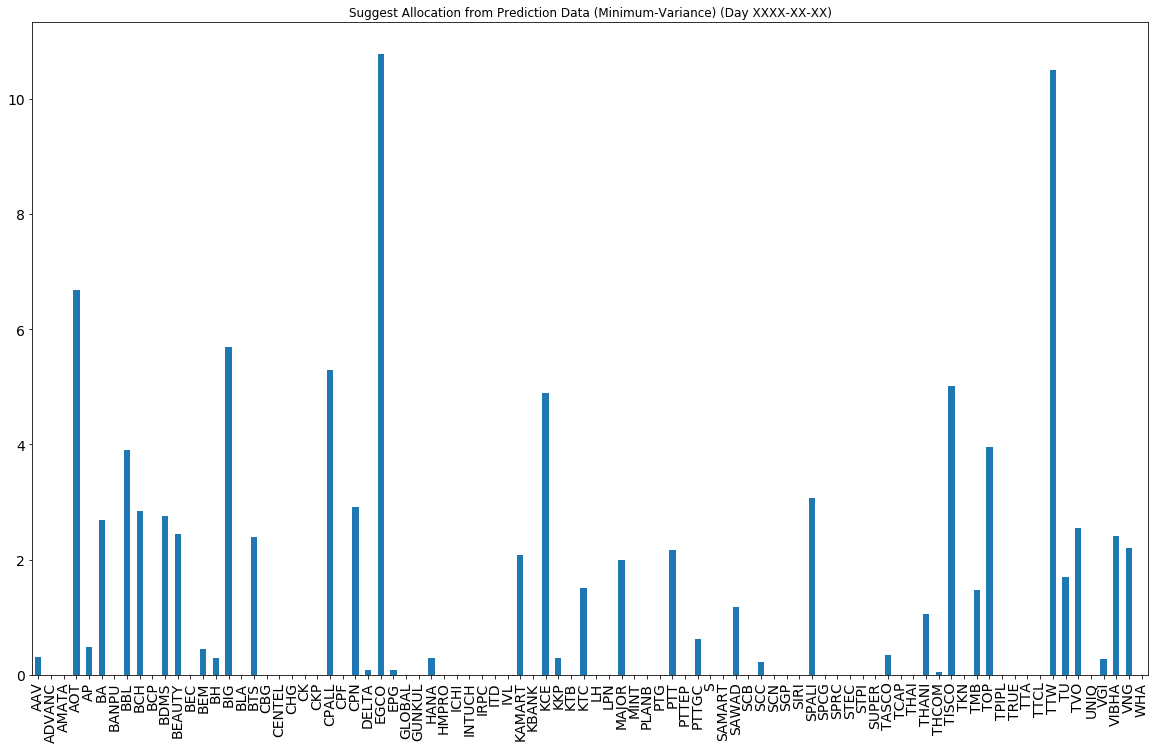

In [82]:
alloc_weight_period1.plot(kind='bar', figsize=(20, 12), fontsize=14, legend=False, title="Suggest Allocation from Prediction Data (Minimum-Variance) (Day XXXX-XX-XX)")